# what is timeseries?
* Time Series algorithm provides multiple algorithms that are optimized for forecasting continuous values, such as product sales, over time.A time series model can predict trends based only on the original dataset that is used to create the model.
* Across industries, organizations commonly use time series data, which means any information collected over a regular interval of time, in their operations. Examples include daily stock prices, energy consumption rates, social media engagement metrics and retail demand, among others. Analyze time series data yields insights like trends, seasonal patterns and forecasts into future events that can help generate profits. For example, by understanding the seasonal trends in demand for retail products, companies can plan promotions to maximize sales throughout the year.

**White noise**
* A time series is white noise if the variables are independent and identically distributed with a mean of zero. This means that all variables have the same variance (sigma^2) and each value has a zero correlation with all other values in the series.


**Data patterns**

**cycle**
* A cyclic pattern occurs when data rise and fall, but this does not happen within the fixed time and the duration of these fluctuations is usually at least 2 years
![](cycle.png)

**Trend**
* A trend pattern exists when there is a long-term increase or decrease in the series. The trend can be linear, exponential
![](trend.png)

**Seasonal**
* Seasonality exists when data is influenced by seasonal factors, such as a day of the week, a month, and one-quarter of the     year. A seasonal pattern exists of a fixed known period.
![](sea.png)

**Random**
* which do not follow any trend ,cycle or seasonal patterns
![](ran.png)


**Types**
* Types of time series models are moving average,ARIMA.The crucial thing is to choose the right forecasting method as per the characteristics of the time series data.



**MA(Moving Average)**
* A moving average is defined as an average of fixed number of items in the time series which move through the series by dropping the top items of the previous averaged group and adding the next in each successive average.
Yt depends only on random error terms
     	Yt = f( εt, εt-1, εt-2, εt-3, ..)
		or
 	Yt = β + εt + θ1 εt-1 + θ2εt-2 + θ3 εt-3 +…



**AR(Auto Regressive)**
* Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step. It is a very simple idea that can result in accurate forecasts on a range of time series problems.
* Yt depends only of past values. 
* Yt-1, Yt-2, Yt-3 etc
              * Yt  = f(Yt-1, Yt-2, Yt-3… )
              * Yt = β0 + β1Yt-1 + β2Yt-2 + β3Yt-3 …


**ARMA**
* Time series, autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression (AR) and the second for the moving average (MA).
* Combines AR and MA
	* Yt = β0 + β1Yt-1 + β2Yt-2 + β3Yt-3 …εt + θ1 εt-1 + θ2εt-2 + θ3 εt-3 +…


**ARIMA**
* Autoregressive Integrated Moving Average (ARIMA) model is another widely used forecasting technique that involves the combination of two or more time series models. This model is suitable for multivariate non-stationary data. ARIMA method is based on the concepts of autoregression, autocorrelation, and moving average.






In [ ]:
## Creating date dataframe
import pandas as pd
pd.date_range('2019-11-01',periods=30,freq='M')

DatetimeIndex(['2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
## Importing librries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## loading the data
data=pd.read_csv('/content/AirPassengers.csv')

In [ ]:
data.head()#first five rows

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.tail()#last 5 rows

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
data.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
## parsing the date and using date column as index

data=pd.read_csv('/content/AirPassengers.csv',parse_dates=[0],index_col='Month')
#parse_dates=[0]->We give the function a hint that data in the first column contains dates that need to be parsed. 

# Basic checks

In [ ]:
data.head()#first five rows


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
data.tail()#last five rows



,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [ ]:
data.describe()##used to view some basic statistical details like percentile, mean, std etc. 

,Sales
count,36.00000
mean,295.75000
std,117.81908
min,119.00000
25%,192.50000
50%,280.00000
75%,402.75000
max,520.00000


# EDA

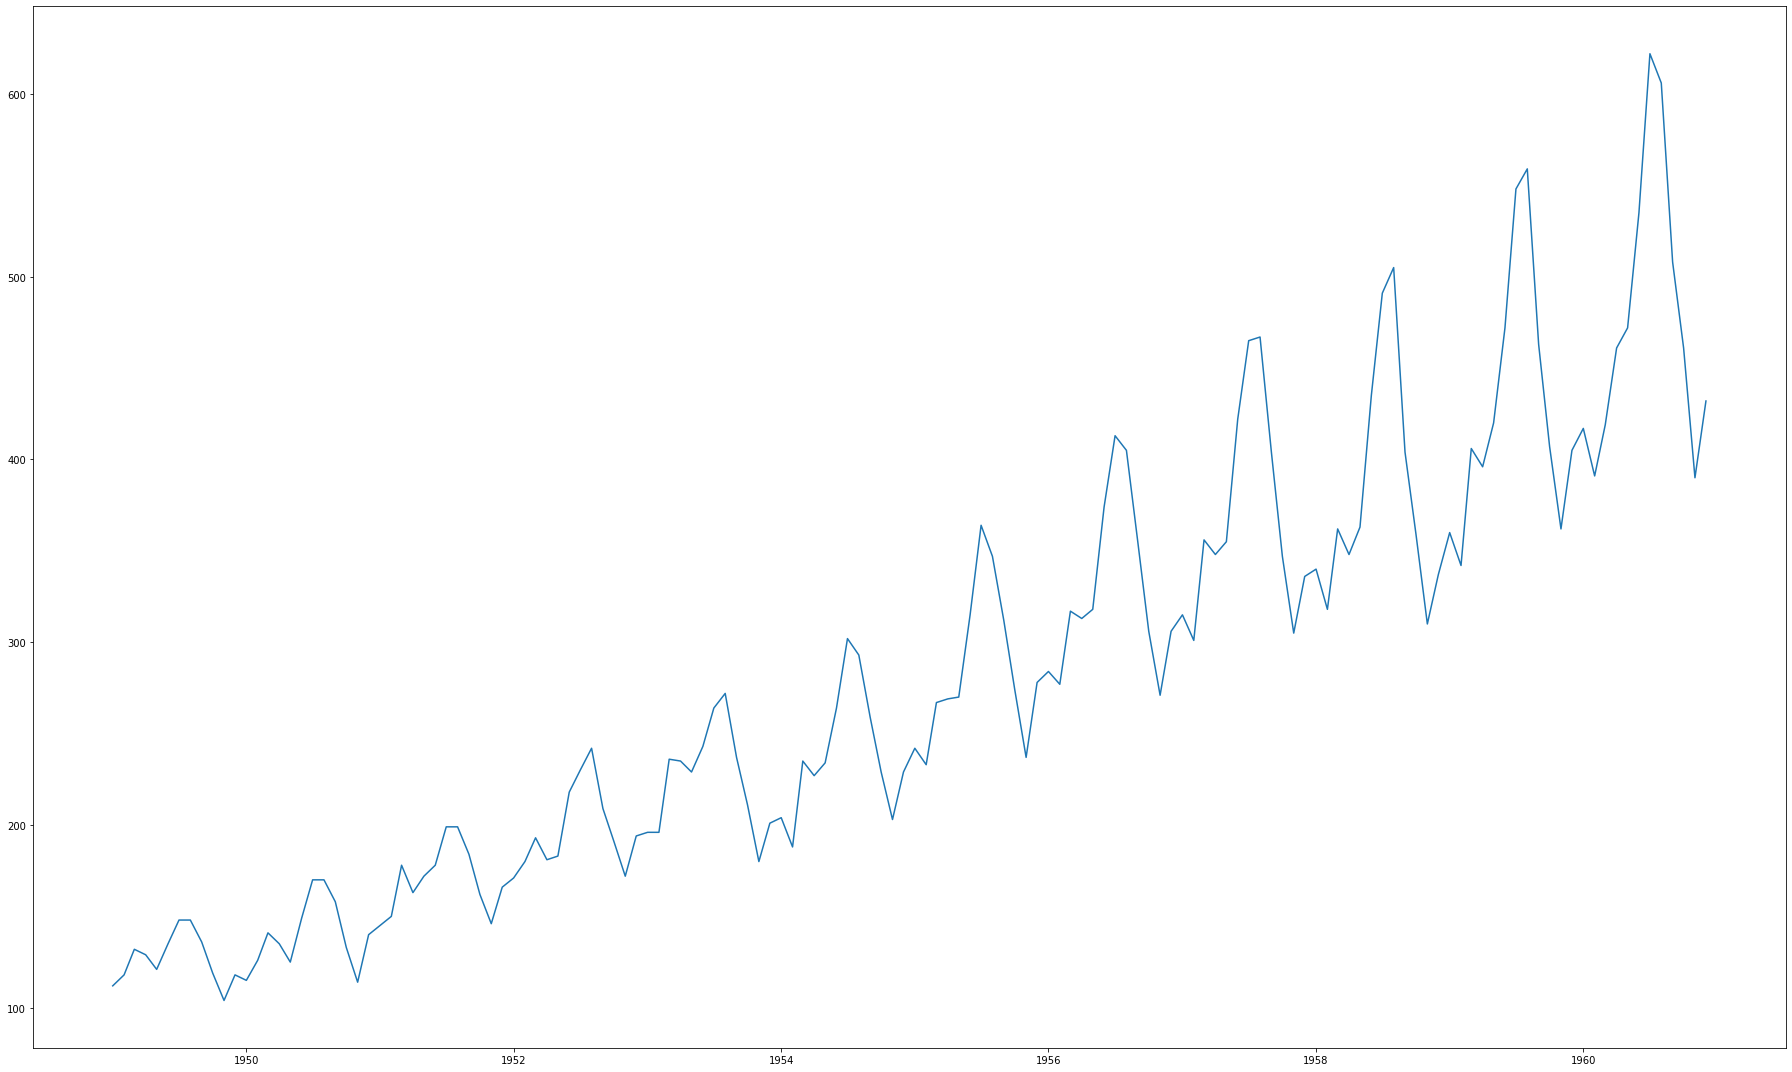

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15),facecolor='white')#canvas  size
plt.plot(data)#line plot 
plt.tight_layout()
## from plot we can see the series given is not stationary

## Stationarity

* Stationarity means that the statistical properties of a time series (or rather the process generating it) do not change over time.
* Stationarity is important because many useful analytical tools and statistical tests and models rely on it.

* Constant mean
* Constant variance
* Constant covariance between periods of identical distance

* All it states is that the covariance between time periods of identical lengths (let’s say 10 days/hours/minutes) should be identical to the covariance of some other period of the same length:

![image-2.png](attachment:image-2.png)



* why do we need stationarity? 2 reasons (the most important ones):
Stationary processes are easier to analyze
Stationarity is assumed by most of the algorithms

* How to check if given series is stationary or not.
We need to check autocorrelation
Autocorrelation is the similarity between observations as a function of the time lag between them.

* When plotting the value of the ACF for increasing lags (a plot called a correlogram), the values tend to degrade to zero quickly for stationary time series (see figure 1, right), while for non-stationary data the degradation will happen more slowly 

In [ ]:
## Plotting the autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

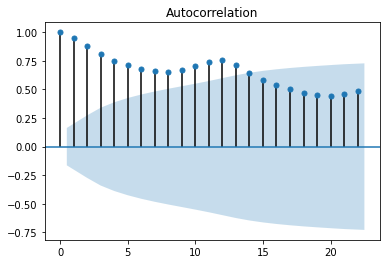

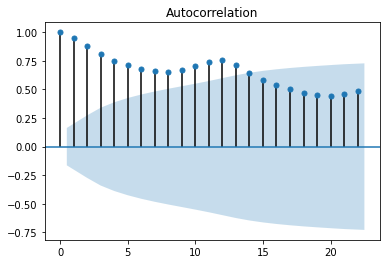

In [ ]:
plot_acf(data)
## from the autocorrelation plot it is clear that given series is not stationary

In [ ]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1)#This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [ ]:
data1#loading the data

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0
2016-07-01,63.0
2016-08-01,-7.0
2016-09-01,-32.0


In [ ]:
data1=data1.iloc[1:]#columns from 1 one to end 

In [ ]:
data1#data

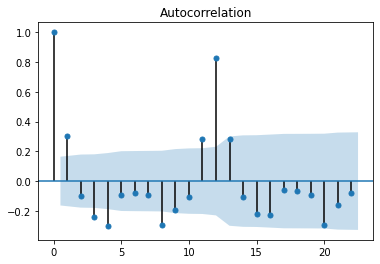

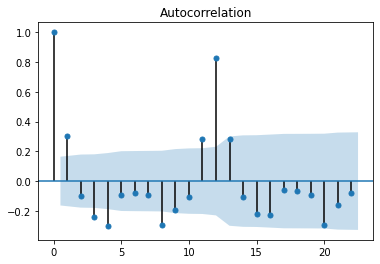

In [ ]:
plot_acf(data1)#A plot of the autocorrelation of a time series by lag 

In [ ]:
data2=data1.diff(periods=1)

In [ ]:
data3=data2.iloc[1:]#columns from 1 one to end

(35, 1)

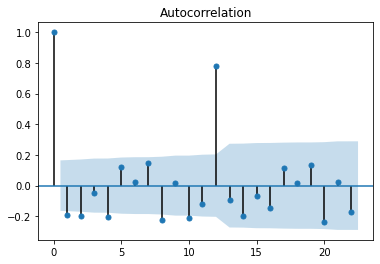

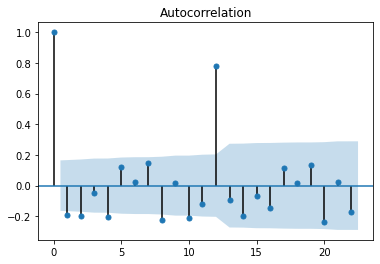

In [ ]:
plot_acf(data3)

In [ ]:
data3.shape#shape of the data rows and columns

(142, 1)

In [ ]:
## Creating training and test sets
train=data3[:100]#from 0th rows to 26th rows traning data
test=data3[100:]#from 27th rows to end testing data

In [ ]:
train.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1949-03-01 to 1957-06-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #Passengers  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Applying autoregressive model
#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa import ar_model
from ar_model import AutoReg

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

ImportError: ignored

In [ ]:
## model creation
ar_model=AR(train) ## object creation
ar_model_fit=ar_model.fit()#traing model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
##making prediction
prediction=ar_model_fit.predict(start=100,end=142)

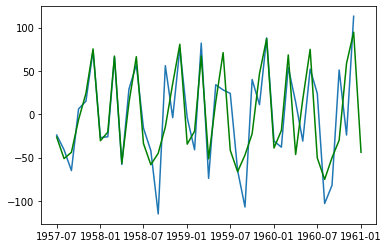

In [ ]:
import matplotlib.pyplot as plt

plt.plot(test)
plt.plot(prediction,color='green')#graph of test vs prediction

## ARIMA Model

In [ ]:
## importing the library
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
## evaluate the model
print(model_arima_fit.aic)

1023.0125531345923


In [ ]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=9)[0]

In [ ]:
predictions

array([38.45074519, 49.78993072, 44.87574856, 47.99393153, 47.14254396,
       48.25290613, 48.39377752, 49.01376832, 49.39697976])

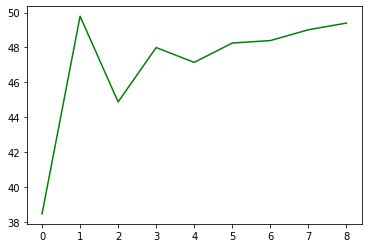

In [ ]:
## plotting the forecasted values
plt.plot(predictions,color='green')

In [ ]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))# is used to find the cartesian product from the given iterator,
# output is lexicographic ordered.
pdq#number of combinaton of pdq

In [ ]:

##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
for params in pdq:#iterating params over pdq
    try:
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
    except:
        continue
#take lowest aic score        

In [ ]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 1, 3))

model_arima_fit = model_arima.fit()#training

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
print(model_arima_fit.aic)#aic score

904.9075444367646


In [ ]:
forecast = model_arima_fit.forecast(steps=9)[0]

In [ ]:
forecast

array([-36.88830612,  12.0325693 ,  12.36750012, -33.12608522,
        30.4403424 ,  12.32434895, -36.09949967,  24.28751629,
        13.21350965])

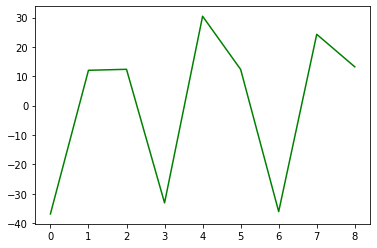

In [ ]:
plt.plot(forecast,color='green')#line plot for prediction

In [ ]:
pip install pmdarima

In [ ]:
#from pmdarima.arima import auto_arima --- Please note this code has got compatibility issue please dont explain untill it is resolved.
import pmdarima as pmd
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])